This is the rough flow required for converting receipt data from a PDF to a spreadsheet that can be analyzed. 

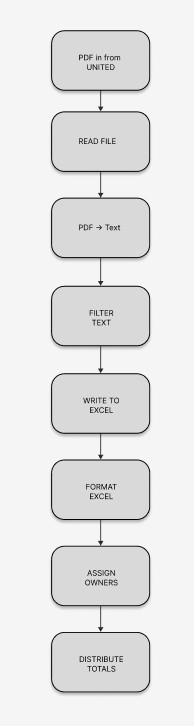

Each of these stages is critical to the final outcome. Filtering the Text and Writing to Excel have proven to be the meat of the matter.

This is my Toy Receipt:
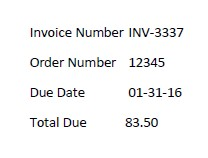

My script can read this fine using the PDF Read function and outputting to strPDF as text. So how do I write this unfiltered data to Excel?

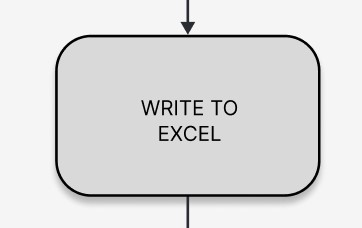

Excel Scope allows us to specify the Excel Sheet to be affected and it allows us to keep that sheet persitantly open while sending data to it.

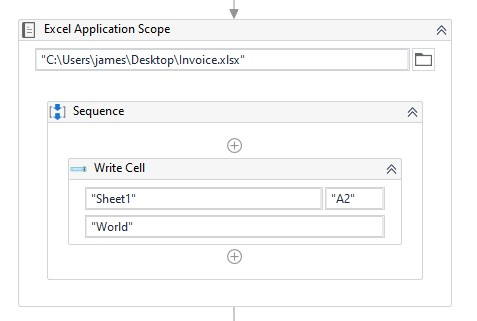

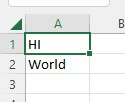

At some point, I must have set the state to something that produced nearly the output I'm seeking.

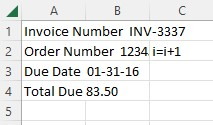

So generate table node allows us to cast the PDF text to a data table which can be written to Excel.
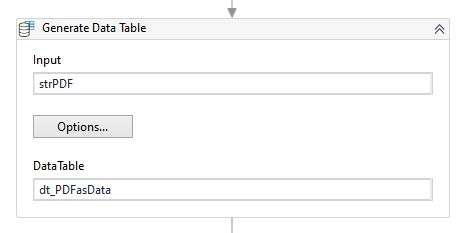

So now we can read a PDF, and turn that into a Table, and write the Table to Excel. Good times.

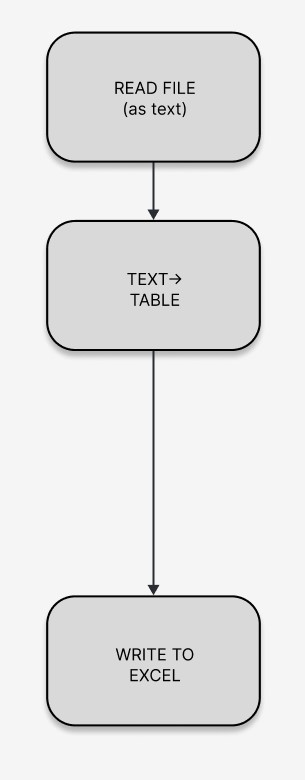

So obviously the missing piece is, manipulating / filtering the text.

Upon doing a pull from my Git, I needed to reinstall the 'Action' that reads the PDF. As documented, sourced from Ander's video on Extracting Data from PDF with Regex.
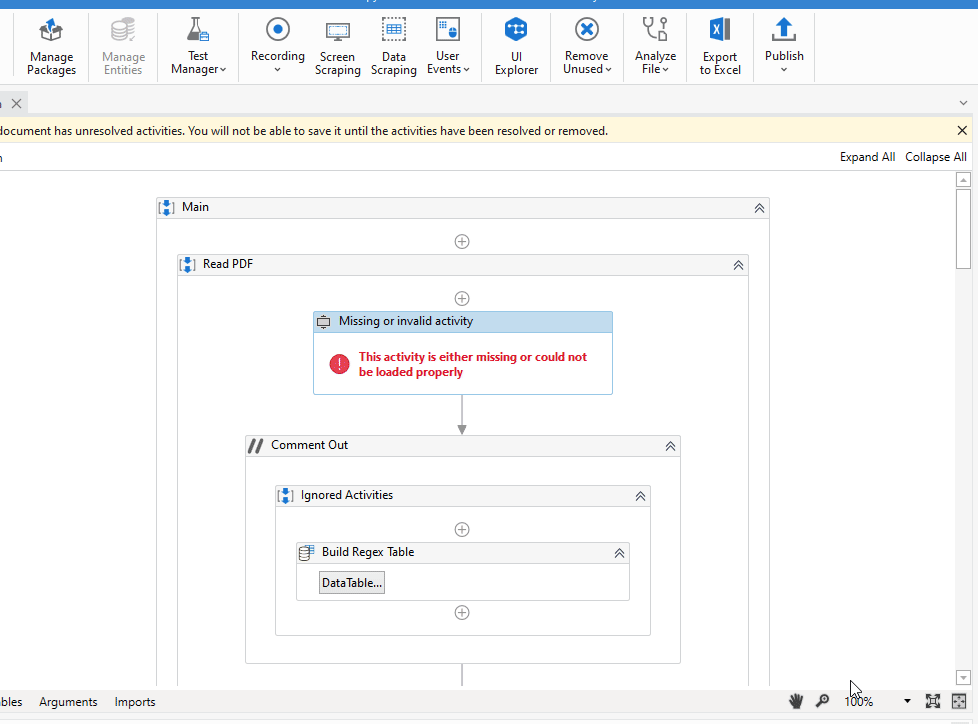

For Each Action, works on string Data, resulting in a parsing of each character, but it doesn't work with table data. That needs a different Action.

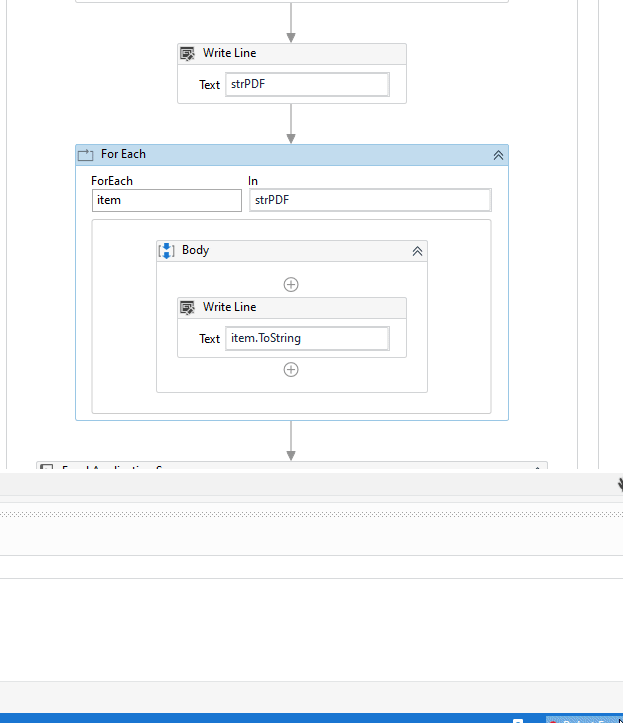

It is working, but I don't know why yet.

We added back the data row, we also switched the written output for Excel to dtOutput. Even though the Add Data Row says in put, we assign it the dtOutput.

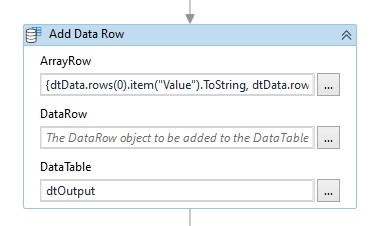

This is the string necessary to create an array of values - so it pulls from the rows in the build table (dtData).{dtData.rows(0).item("Value").ToString, dtData.rows(1).item("Value").ToString, dtData.rows(2).item("Value").ToString}

I don't know what I broke - I added the loop and created two new test PDF's and located them to a new folder. Now every file I have saved has an error ranging from Cyclical dependencies to Invalid Object reference and others. The branch I checked out - I think I should have committed before I branched. I see commits I could revert to on main, but none of the revert commands seem to work using the SHA I input.

Useful for learning how to revert. Using the SHA requires no special syntax.

https://www.freecodecamp.org/news/git-reverting-to-previous-commit-how-to-revert-to-last-commit/

This was useful for creating a pretty version of git log. Also git log --oneline is useful.
git log --pretty=format:"%h %s" --graph   

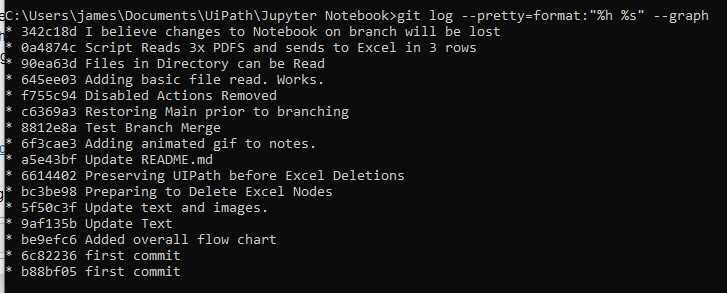

UIPath, or VB has odd requirements, like this For Each has to be cast as a string for the 'file' value to work. I suppose that makes sense given that we are indexing through file names, but nonetheless.. I could not easily discover that on my own.

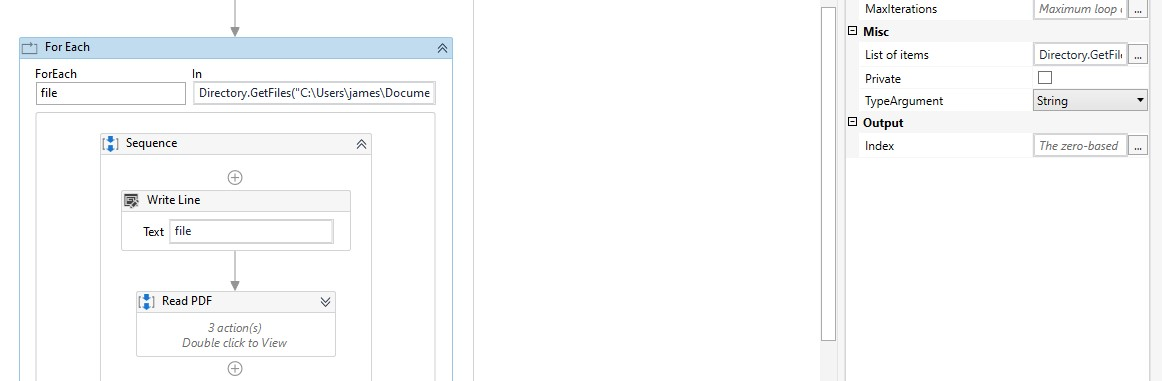

We added data for what would be a new shopping PDF, that caused an error because no data was found.
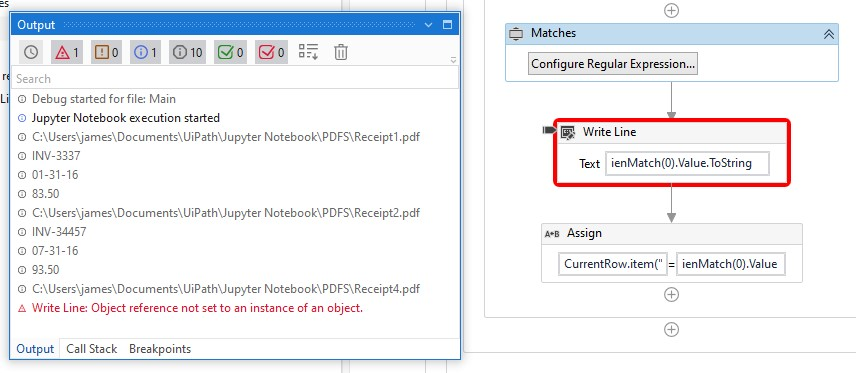

A good goal would be to try to pick up the order number and display that.

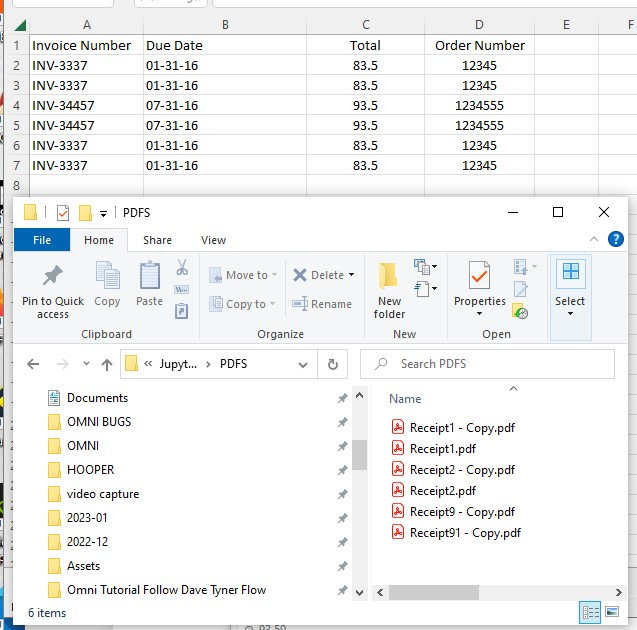

I was hoping for some level of automation, but it appears that some PDF's can be read in the folder and others cannot. If I duplicate the PDF's, they work fine, but if I create a new one, it fails.

I've switched to a new branch, called 'inputExcel'.

I've tested switching branches and there is a delta of one line. Works well. Next is to test the merge.

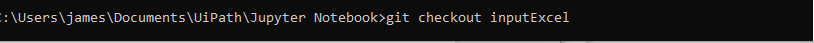

We created a workflow so we can create toy tests on the side. Within the second flow, we used two Excel Scopes and a Read range and a Write range to copy Sheet A to Sheet B. The read range outputs a data table, dt_Excel to be read later.

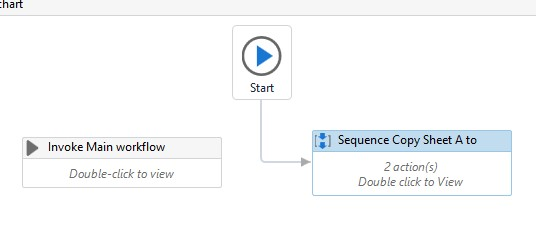

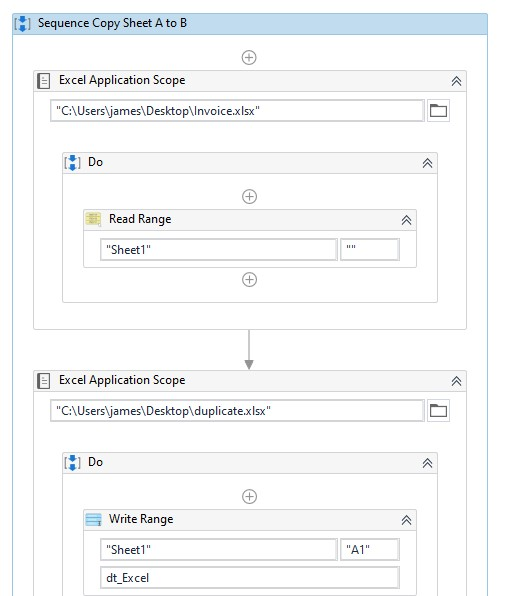

So unfortunately, in looking at our Flowchart, we are still at Reading and Writing.
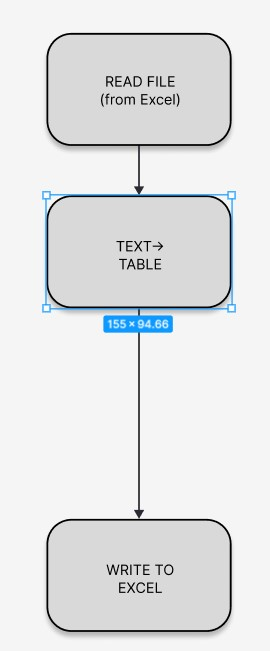

We need to not only be able to read and write a sheet, but to be able to work with each row line by line.
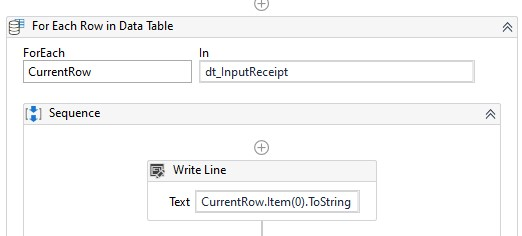

The Item(0) is critical as '0' specificies the column to read.

The matches node, needs a string input and is attached to the REGEX table which isnt accessible somehow.
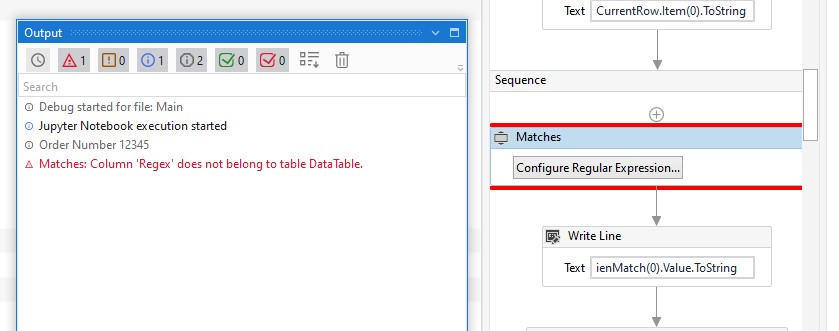

Overall, progress has been disappointing. Essentially we are just taking vertical data on a page and making into a table. We have tested against clean input, but the incoming receipts are not clean. 
I note that Excel can handle Regex in the sheet. So if only there was one Regex Formula I could apply to every cell.
https://www.ablebits.com/office-addins-blog/excel-regex-formulas/
Following the directions at:
https://stackoverflow.com/questions/22542834/how-to-use-regular-expressions-regex-in-microsoft-excel-both-in-cell-and-loops
Shows that we are unable to access Regex within VB - or these directions are non-applicable.

